# ***Case Study 01 Data Mining (EDA)***
## *Kelompok 3*

### Anggota Kelompok:
- Favian Sulthan Wafi
- Fernaldy
- Kalisha Rahma Firza
- Nasywa Safira Ardanty
- Nurkhalisha Humaira

# **Kasus:**


*   Anda adalah seorang Data Analyst yang bekerja di PT Ray Pink Property Indonesia (RPPI).
*   RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
*   RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
*   Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
*   Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
*   Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
*   Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
*   Di studi kasus ini anda mempersiapkan "bahan presentasi" (cukup ipynb saja) dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# **Petunjuk:**
Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:


1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. ika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?


# **Catatan:**

*   Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
*   Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
*   Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
*   Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
*   Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab. Saran: Gunakan GitHub lalu run di Google Colab.
*   Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
*   Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
*   Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
*  Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

# **Komponen Penilaian:**
*   Code tidak diubah sejak deadline studi kasus (Diskusi di kelas).
*   Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
*  Pemilihan preprocessing dan visualisasi yang tepat
*  Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
*  Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.




# **Data Understanding(DU):**
Keterangan Variabel:

* Created_at: Tanggal dimana iklan rumah dibuat
* LT : Luas Tanah properti yang ditawarkan
* LB : Luas Bangunan properti yang ditawarkan
* KT : Jumlah Kamar Tidur properti yang ditawarkan
* KM : Jumlah Kamar Mandi properti yang ditawarkan
* Garasi : Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport : Kapasitas Carport di properti yang ditawarkan
* Lokasi : Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik : Daya listrik dari properti yang ditawarkan
* Hadap : Keterangan property yang ditawarkan menghadap ke arah mana
* Harga : Harga property yang ditawarkan dalam Rupiah
* URL : Alamat tautan (link) property yang ditawarkan.
* Deskripsi : Deskripsi iklan property yang ditawarkan.

# Preprocessing

## Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [ ]:
!gdown 1bX2XqiOGFEszgmqMc5Ym2meC0qeNQEeQ

Downloading...
From: https://drive.google.com/uc?id=1bX2XqiOGFEszgmqMc5Ym2meC0qeNQEeQ
To: /content/Data-Property-Indonesia-Ganjil-2023.xlsx
100% 779k/779k [00:00<00:00, 114MB/s]


In [ ]:
file = '/content/Data-Property-Indonesia-Ganjil-2023.xlsx'
sheets = pd.read_excel(file, sheet_name = None)

Data yang tersedia terdiri dari 15 sheets, di mana tiap sheets memiliki variabel yang sama, tapi penulisan nama kolom yang berbeda. Agar data dari tiap sheets dapat di-*merge*, akan dilakukan standarisasi nama kolom dari tiap sheets.

In [ ]:
from pandas.io.excel import ExcelWriter
with ExcelWriter(file) as writer:
  for name, sheet in sheets.items():
    sheet.rename(columns = {sheet.columns[0]:"created_at", sheet.columns[1]:"LT", sheet.columns[2]:"LB",
                            sheet.columns[3]:"KT", sheet.columns[4]:"KM", sheet.columns[5]:"garasi",
                            sheet.columns[6]:"carport", sheet.columns[7]:"lokasi", sheet.columns[8]:"sertifikat",
                            sheet.columns[9]:"listrik", sheet.columns[10]:"hadap", sheet.columns[11]:"harga",
                            sheet.columns[12]:"url", sheet.columns[13]:"deskripsi"}, inplace = True)
    sheet.to_excel(excel_writer = writer, sheet_name  = name, index = False)
  writer.save()

<ipython-input-141-210a9e8ac000>:10: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
df = pd.concat(sheets)

df = df.reset_index()
df

,level_0,level_1,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,Unnamed: 14
0,Bogor,0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",NaN
1,Bogor,1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
2,Bogor,2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
3,Bogor,3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
4,Bogor,4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Sulawesi(All),160,19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,NaN
3080,Sulawesi(All),161,18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ...",NaN
3081,Sulawesi(All),162,17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...,NaN
3082,Sulawesi(All),163,14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,NaN


In [ ]:
df = df.rename(columns = {'level_0' :'kawasan'})
df = df.drop(['level_1', 'Unnamed: 14'], axis = 1)
df

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi
0,Bogor,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,Bogor,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,Bogor,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,Bogor,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,Bogor,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Sulawesi(All),19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...
3080,Sulawesi(All),18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ..."
3081,Sulawesi(All),17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...
3082,Sulawesi(All),14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kawasan     3084 non-null   object 
 1   created_at  3066 non-null   object 
 2   LT          3067 non-null   object 
 3   LB          3065 non-null   float64
 4   KT          3064 non-null   object 
 5   KM          3062 non-null   object 
 6   garasi      2014 non-null   object 
 7   carport     2511 non-null   object 
 8   lokasi      3065 non-null   object 
 9   sertifikat  3057 non-null   object 
 10  listrik     2842 non-null   object 
 11  hadap       1400 non-null   object 
 12  harga       3064 non-null   object 
 13  url         3063 non-null   object 
 14  deskripsi   3041 non-null   object 
dtypes: float64(1), object(14)
memory usage: 361.5+ KB


## Missing Value dan Duplicate

In [ ]:
df.isna().sum()

kawasan          0
created_at      18
LT              17
LB              19
KT              20
KM              22
garasi        1070
carport        573
lokasi          19
sertifikat      27
listrik        242
hadap         1684
harga           20
url             21
deskripsi       43
dtype: int64

In [ ]:
df.duplicated().sum()

20

Data yang duplikat akan dihapus.

In [ ]:
df.drop_duplicates(keep="first", inplace=True)
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
#Data berhasil di bersihkan dari data duplikat

(3064, 15)
jumlah data yang duplikat 0


In [ ]:
#Mencari persentase missing value
(df.isnull().sum()/len(df)).to_frame('persentase missing')

,persentase missing
kawasan,0.000000
created_at,0.000653
LT,0.000326
LB,0.000979
KT,0.001305
KM,0.001958
garasi,0.343995
carport,0.181789
lokasi,0.000979
sertifikat,0.003590


Jumlah *missing value* dari variabel hadap cukup banyak, yaitu sekitar 50% dari data. Mengimputasi *missing value* juga bukan langkah yang tepat. Langkah yang menurut kami paling tepat untuk dilakukan adalah menghapus variabel hadap. Hal ini dilakukan dengan pertimbangan orang-orang tidak terlalu memedulikan rumah yang akan dibeli menghadap ke mana karena tidak semua orang mempercayai akan hal seperti fengshui dan hal tersebut dapat ditanyakan lebih lanjut kepada sang penjual, hal yang utama ketika membeli rumah adalah seperti jumlah kamar, harga, dan variabel penting lainnya.

In [ ]:
del df['hadap']

## Variabel created_at

In [ ]:
df[df['created_at'].isna()]

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
1721,Padang - Palembang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,Padang - Palembang,NaN,Keterangan = Harga dalam bentuk juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Terlihat bahwa baris dengan kolom 'created_at' yang kosong tidak dapat membantu menambahkan insight karena kolom lainnya rata-rata merupakan missing value juga. Maka, kami memutuskan untuk menghapus baris-baris tersebut.

In [ ]:
df = df.dropna(subset = ['created_at'])
df.isna().sum()

kawasan          0
created_at       0
LT               0
LB               1
KT               2
KM               4
garasi        1052
carport        555
lokasi           1
sertifikat       9
listrik        224
harga            2
url              3
deskripsi       25
dtype: int64

Karena nilai-nilai dari variabel created_at masih belum standar, maka variabel ini akan distandarisasi.

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['created_at'] = df['created_at'].dt.strftime('%d-%m-%Y')

<ipython-input-152-151f663283dd>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
<ipython-input-152-151f663283dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
<ipython-input-152-151f663283dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [ ]:
df

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
0,Bogor,12-03-2021,75,38.0,2,1,1,1,Bojonggede,SHM,1300,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,Bogor,12-06-2021,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,Bogor,12-06-2021,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,Bogor,12-06-2021,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,Bogor,12-06-2021,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Sulawesi(All),19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...
3080,Sulawesi(All),18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ..."
3081,Sulawesi(All),17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...
3082,Sulawesi(All),14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...


## Variabel Listrik

In [ ]:
df['listrik'].value_counts()

2200         1048
1300          924
3500          204
4400          152
5500          119
             ... 
3300 Watt       1
17600           1
5500 Watt       1
7600.0          1
4899            1
Name: listrik, Length: 66, dtype: int64

Terlihat bahwa nilai-nilai pada variabel listrik kurang baik. Ada yang meng-*input* '1900' dan ada juga yang meng-*input* '1900 Watt'. Maka dari itu, data perlu distandarisasi.

In [ ]:
df['listrik'].astype(str)

df['listrik'] = df['listrik'].replace(r'[A-Za-z]', '', regex=True)
df['listrik'] = df['listrik'].replace(r'/-1', '', regex=True)
df['listrik'] = df['listrik'].replace(['', ' ', '-', 0], np.nan)

<ipython-input-155-2f4820138d78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listrik'] = df['listrik'].replace(r'[A-Za-z]', '', regex=True)
<ipython-input-155-2f4820138d78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listrik'] = df['listrik'].replace(r'/-1', '', regex=True)
<ipython-input-155-2f4820138d78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
df['listrik'].astype(float)

0       1300.0
1       2200.0
2       2200.0
3       2200.0
4       2200.0
         ...  
3079       NaN
3080    3500.0
3081    1300.0
3082     900.0
3083    2200.0
Name: listrik, Length: 3062, dtype: float64

In [ ]:
df['listrik'].value_counts() # ada baiknya divisualisasikan nanti

2200       1048
1300        924
3500        204
4400        152
5500        119
900          63
1300         63
3300         38
7700.0       28
6600         23
11000.0      20
2200         12
13200         8
10000.0       8
16500         7
450           6
900           5
3500          5
33000         4
23000.0       4
8000.0        4
2300          3
66000.0       3
10600.0       3
1200          3
2000          3
4500.0        2
3000.0        2
19000.0       2
220           2
22000.0       2
4400          2
2400          1
38500.0       1
11500.0       1
7500.0        1
5000.0        1
15000         1
2500.0        1
13900.0       1
4000.0        1
130.0         1
400           1
13300.0       1
2300          1
3900.0        1
16000.0       1
9500.0        1
9900.0        1
26400.0       1
13000.0       1
2400          1
18000.0       1
17600         1
450           1
7600.0        1
5500          1
3300          1
4899          1
Name: listrik, dtype: int64

In [ ]:
df['listrik'].isna().sum()

263

Missing value dari variabel listrik akan diimputasi dengan Iterative Imputer.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)

# Mengisi missing values dalam kolom 'listrik'
df['listrik'] = imputer.fit_transform(df[['listrik']])
df['listrik'] = df['listrik'].astype(int)

<ipython-input-159-a479bcb700b1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listrik'] = imputer.fit_transform(df[['listrik']])
<ipython-input-159-a479bcb700b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['listrik'] = df['listrik'].astype(int)


In [ ]:
df['listrik'].isna().sum()

0

## Variabel KT, KM, garasi, dan carport.

Selanjutnya, missing value dari KT, KM, garasi, dan carport akan diimputasi dengan nilai 0. Sementara missing value dari sertifikat diimputasi dengan nilai 'Tidak ada'. Alasannya adalah variabel-variabel tersebut merupakan variabel penting yang menjadi nilai tambah sebuah rumah. Maka dari itu, kemungkinan besar penjual rumah tidak meng-*input*nya karena memang tidak ada. Khusus untuk KT dan KM, kami mengasumsikan bahwa terdapat ruangan untuk kamar mandi dan kamar tidur, tapi tidak bersifat *fix* karena ruangannya fleksibel sehingga bisa dialihfungsikan.

In [ ]:
var = ['KT', 'KM', 'garasi', 'carport']

for i in var:
  df[i] = df[i].replace(r'-', np.nan, regex = True)
  df[i].fillna(value = 0, inplace = True)

df['sertifikat'].fillna(value = 'Tidak ada', inplace = True)
df.isna().sum()

<ipython-input-161-01c1e0a76122>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].replace(r'-', np.nan, regex = True)
<ipython-input-161-01c1e0a76122>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].fillna(value = 0, inplace = True)
<ipython-input-161-01c1e0a76122>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sertifikat'].fillna(value = 'Tidak ada', i

kawasan        0
created_at     0
LT             0
LB             1
KT             0
KM             0
garasi         0
carport        0
lokasi         1
sertifikat     0
listrik        0
harga          2
url            3
deskripsi     25
dtype: int64

## Variabel LB

In [ ]:
df[df['LB'].isna()]

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
299,Lampung - Sumatera selatan,12-05-2021,391,NaN,7.0,7.0,0.0,0.0,"Teluk Betung Utara, Bandar Lampung",SHM,2719,1000000000,https://rumahdijual.com/lampung/10121111-rumah...,"sumber air tanah, bebas banjir, butuh renovasi"


Diasumsikan LB tidak melebihi LT. Diasumsikan pula bahwa LB memiliki nilai maksimum, yaitu sama dengan LT.

In [ ]:
df['LB'].fillna(df['LT'], inplace = True)

<ipython-input-163-acdf9528fcf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LB'].fillna(df['LT'], inplace = True)


## Variabel Harga

In [ ]:
df['harga'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3062 entries, 0 to 3083
Series name: harga
Non-Null Count  Dtype 
--------------  ----- 
3060 non-null   object
dtypes: object(1)
memory usage: 47.8+ KB


In [ ]:
df['harga'].value_counts()

1500000000    55
1200000000    52
850000000     43
600000000     40
1600000000    40
              ..
5300           1
2410           1
2600           1
5050           1
348000000      1
Name: harga, Length: 907, dtype: int64

In [ ]:
df['harga'].isna().sum()

2

In [ ]:
df[df['harga'].isna()]

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
667,Kalimantan (All),09-07-2023,73,50.0,2.0,1.0,0.0,0.0,"Bontang Utara, Bontang, Kalimantan Timur",SHM,1300,NaN,NaN,NaN
2130,Bandung,30-07-2023,157,157.0,4.0,2.0,0.0,1.0,Cileunyi,SHM,1300,NaN,NaN,NaN


Terdapat 2 rumah yang tidak memiliki harga, maka akan dihapus rumah yang tidak memiliki harga.

In [ ]:
df.dropna(subset=['harga'], inplace=True)
df.reset_index(drop=True, inplace=True)

<ipython-input-168-5e353aeb35f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['harga'], inplace=True)


Terlihat bahwa nilai-nilai pada variabel harga kurang baik. Maka dari itu, data perlu distandarisasi.

In [ ]:
#df['harga'].astype(str)
df['harga'] = df['harga'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))

df

<ipython-input-169-6e6761b630df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga'] = df['harga'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))


,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
0,Bogor,12-03-2021,75,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,Bogor,12-06-2021,60,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,Bogor,12-06-2021,60,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,Bogor,12-06-2021,60,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,Bogor,12-06-2021,90,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,Sulawesi(All),19-09-2023,1030,467.0,2.0,1.0,0.0,1.0,"Malalayang, Manado",SHM,2719,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...
3056,Sulawesi(All),18-09-2023,96,96.0,2.0,1.0,0.0,1.0,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ..."
3057,Sulawesi(All),17-09-2023,115,45.0,2.0,1.0,0.0,1.0,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...
3058,Sulawesi(All),14-09-2023,102,72.0,2.0,1.0,0.0,1.0,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...


Dilihat secara sekilas, variabel harga telah berhasil distandarisasi bentuknya dan tipenya menjadi integer.

In [ ]:
for i in df['harga']:
  if i == 0:
    print(i)

In [ ]:
df['harga'].isna().sum()

0

Dari jumlah missing value yang bernilai 0 dan tidak ada data yang bernilai 0, diasumsikan standarisasi telah berhasil. Selanjutnya, kami melihat bahwa banyak data yang nilai harganya kurang dari Rp1.000.000, yang mana di tahun 2021 hingga 2023, harga rumah pasti lebih dari itu. Kami mengasumsikan data di-*input* dalam satuan Rp10.000, maka data-data yang kurang dari Rp1.000.000 dikali 10.000

In [ ]:
df.loc[df['harga'] < 1000000, 'harga'] *= 1000

Kami juga melihat bahwa banyak data yang nilai harganya kurang dari Rp10.000.000, yang mana di tahun 2021 hingga 2023, harga rumah pasti lebih dari itu. Kami mengasumsikan data di-*input* dalam satuan Rp100, maka data-data yang kurang dari Rp10.000.000 dikali 100

In [ ]:
df.loc[df['harga'] < 10000000, 'harga'] *= 100

Terdapat pula harga yang terlalu besar, dalam kasus ini > 1 Triliun. Akan dibagi data tersebut dengan 1000.

In [ ]:
df.loc[df['harga'] > 1000000000000, 'harga'] /= 1000

Selain itu, akan dilakukan penanganan terhadap data dengan harga > 100M tetapi luas tanah yang kecil.

In [ ]:
filtered_df1 = df.loc[(df['harga'] > 10000000000)& (df['harga'] < 100000000000 )]

# Menghitung rata-rata harga
mean_price = filtered_df1['LT'].mean()

print("Mean Luas Tanah untuk harga > 10000000000:", mean_price)

Mean Luas Tanah untuk harga > 10000000000: 397.13165266106444


In [ ]:
filtered_df2 = df.loc[(df['harga'] > 5000000000) & (df['harga'] < 10000000000 )]

# Menghitung rata-rata harga
mean_price = filtered_df2['LT'].mean()

print("Mean Luas Tanah untuk harga > 5000000000:", mean_price)

Mean Luas Tanah untuk harga > 5000000000: 296.6916538461538


Rata-rata luas tanah untuk harga 10-100M dan harga 5-10M akan menjadi acuan bagi data dengan harga > 100M.

Jika harga > 100M, tetapi LT < 400 maka data akan dibagi 100
jika harga > 100M, tetapi LT > 400 maka data akan dibagi 10
Jika harga > 50M, tetapi LT < 300 maka data akan dibagi 10

In [ ]:
df.loc[(df['harga'] > 100000000000) & (df['LT'] < 400), 'harga'] /= 100


In [ ]:
df.loc[(df['harga'] > 100000000000) & (df['LT'] > 400), 'harga'] /= 10

In [ ]:
df.loc[(df['harga'] > 50000000000) & (df['LT'] < 300), 'harga'] /= 10

<ipython-input-180-d1f596c94987>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(df['harga'], kde=True, rug=True)


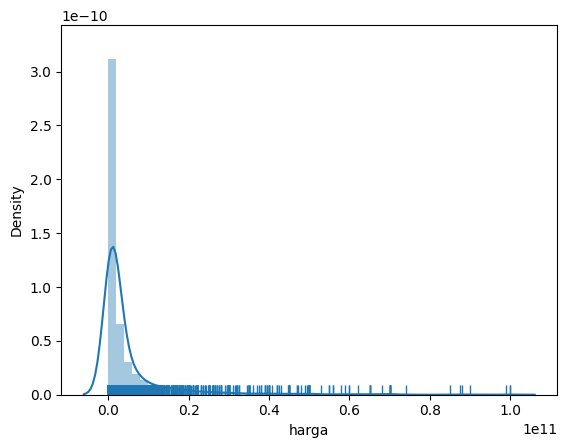

In [ ]:
#Melihat harga berdistribusi normal atau tidak
p = sns.distplot(df['harga'], kde=True, rug=True)

Dapat dilihat bahwa dari plot, plot berbentuk lonceng yang menandakan bahwa data pada tabel harga berdistribusi normal.

## Variabel Sertifikat

In [ ]:
df['sertifikat'].value_counts()

SHM                                2722
SHGB                                121
HGB                                 117
lainnya(PPJB, GIRIK, ADAT, dll)      20
SHM + IMB                            17
Lainnya                              14
PPJB                                 11
Tidak ada                             9
SPPJB                                 4
SHM - IMB                             4
HP                                    3
Lainnya (PPJB,Girik,Adat,dll)         3
SHM,IMB                               2
SHM                                   2
-                                     2
Hak Pakai                             1
AJB                                   1
SHM + Hak Pakai                       1
PPJB,Girik,Adat,dll                   1
HJB                                   1
SHM & IMB                             1
SHBG                                  1
SMB                                   1
SHM + IMB + PBB                       1
Name: sertifikat, dtype: int64

Terlihat bahwa nilai-nilai pada variabel sertifikat kurang baik karena tidak seragam. Maka dari itu, data perlu distandarisasi. Nilai-nilai variabel standarisasi akan dikelompokkan menjadi SHM, SHGB, lainnya, dan tidak ada sertifikat.

In [ ]:
df['sertifikat'] = df['sertifikat'].str.lower()
df['sertifikat'] = df['sertifikat'].str.replace(' ', '')

<ipython-input-182-de927f8e4772>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sertifikat'] = df['sertifikat'].str.lower()
<ipython-input-182-de927f8e4772>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sertifikat'] = df['sertifikat'].str.replace(' ', '')


In [ ]:
df['sertifikat'].value_counts()

shm                             2724
shgb                             121
hgb                              117
lainnya(ppjb,girik,adat,dll)      23
shm+imb                           17
lainnya                           14
ppjb                              11
tidakada                           9
sppjb                              4
shm-imb                            4
hp                                 3
shm,imb                            2
-                                  2
ajb                                1
hakpakai                           1
shm+hakpakai                       1
hjb                                1
ppjb,girik,adat,dll                1
shm&imb                            1
shbg                               1
smb                                1
shm+imb+pbb                        1
Name: sertifikat, dtype: int64

In [ ]:
df['sertifikat'] = df['sertifikat'].str.replace(r'shm\+[A-Za-z]+\+[A-Za-z]+', r'shm')
df['sertifikat'] = df['sertifikat'].str.replace(r'shm\+[A-Za-z]+', r'shm')
df['sertifikat'] = df['sertifikat'].str.replace(r'shm\-[A-Za-z]+', r'shm')
df['sertifikat'] = df['sertifikat'].str.replace(r'shm,[A-Za-z]+', r'shm')
df['sertifikat'] = df['sertifikat'].str.replace(r'shm&[A-Za-z]+', r'shm')
df['sertifikat'] = df['sertifikat'].str.replace(r'^hgb+$', r'shgb')
df['sertifikat'] = df['sertifikat'].str.replace(r'shbg', r'shgb')
df['sertifikat'] = df['sertifikat'].str.replace(r'\-', r'tidakada')
df['sertifikat'] = df['sertifikat'].replace(['ppjb', 'sppjb', 'hp', 'ppjb,girik,adat,dll', 'hjb', 'ajb', 'hakpakai', 'smb', 'lainnya(ppjb,girik,adat,dll)'], r'lainnya')

<ipython-input-184-9e72da538b57>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sertifikat'] = df['sertifikat'].str.replace(r'shm\+[A-Za-z]+\+[A-Za-z]+', r'shm')
<ipython-input-184-9e72da538b57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sertifikat'] = df['sertifikat'].str.replace(r'shm\+[A-Za-z]+\+[A-Za-z]+', r'shm')
<ipython-input-184-9e72da538b57>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sertifikat'] = df['sertifikat'].str.replace(r'shm\+[A-Za-z]+', r'shm')
<ipython-input-184-9e72da538b57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
df['sertifikat'].value_counts()

shm         2750
shgb         239
lainnya       60
tidakada      11
Name: sertifikat, dtype: int64

## Penanganan Outlier

Selanjutnya, outlier pada kolom harga akan kami pisahkan ke dataframe yang baru untuk dapat diteliti lebih lanjut.

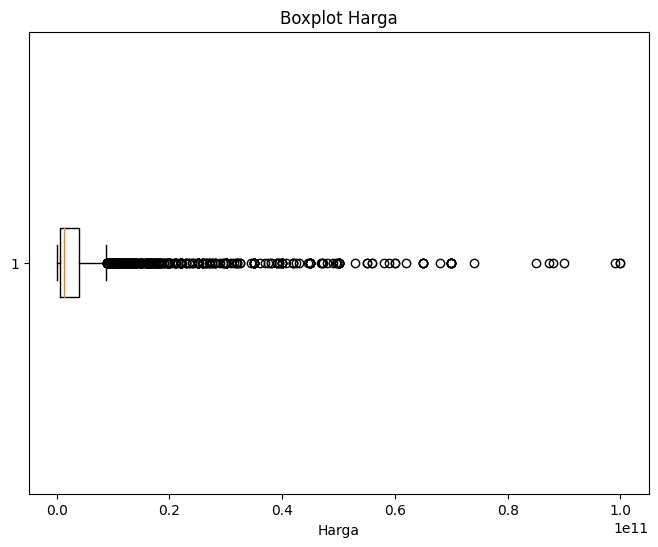

In [ ]:
# Membuat boxplot dari kolom 'harga'
plt.figure(figsize=(8, 6))  # Ukuran figur (opsional)
plt.boxplot(df['harga'], vert=False)  # vert=False membuat boxplot horizontal
plt.xlabel('Harga')  # Label sumbu x (opsional)
plt.title('Boxplot Harga')  # Judul plot (opsional)
plt.show()  # Menampilkan plot

In [ ]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier dalam setiap kolom
outliers = ((df['harga'] < lower_bound) | (df['harga'] > upper_bound))

# Buat DataFrame baru untuk outlier
new_df = df[outliers]

# Buat DataFrame baru tanpa outlier
noout_df = df[~outliers]

In [ ]:
new_df

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi
26,Bogor,12-06-2021,1500,1200.0,8.0,6.0,0.0,8.0,Cileungsi,shm,17600,9900000000,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob..."
37,Bogor,12-06-2021,1272,500.0,4.0,5.0,0.0,2.0,Babakan Madang,shm,5500,15000000000,https://www.rumah.com/listing-properti/dijual-...,Rumah best view
108,Bogor,12-02-2021,867,650.0,5.0,6.0,2.0,4.0,Babakan Madang,shm,5500,16500000000,https://www.rumah123.com/properti/bogor/hos927...,"Perumahan eksklusif, lokasi strategis, gfasili..."
298,Lampung - Sumatera selatan,12-05-2021,1716,1871.0,109.0,106.0,0.0,0.0,"Rajabasa, Bandar Lampung",shm,2719,11000000000,https://rumahdijual.com/lampung/9635319-kost-m...,FASILITAS KAMAR:\n1. Kmr lebih Besar 4x4 dg Sp...
459,Lampung - Sumatera selatan,09-07-2023,1140,1400.0,11.0,6.0,1.0,3.0,"Metro Barat, Metro",lainnya,2719,11000000000,https://www.rumah123.com/properti/metro/hos143...,"Rumah 2 Lantai Jl. Veteran Hadimulyo, Metro Ba..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,Sulawesi(All),29-10-2021,719,1124.0,7.0,8.0,7.0,7.0,"Malalayang, Manado",shm,2719,9000000000,https://www.rumah123.com/properti/manado/hos90...,Rumah Manado\nView laut & Kota\nLokasi Strateg...
2988,Sulawesi(All),29-10-2021,719,1124.0,7.0,8.0,7.0,7.0,"Malalayang, Manado",shm,2719,9000000000,https://www.rumah123.com/properti/manado/hos90...,Rumah Mewah View Laut & Kota Manado\nDekat uni...
2989,Sulawesi(All),29-10-2021,719,1124.0,7.0,8.0,7.0,7.0,"Malalayang, Manado",shm,5500,9000000000,https://www.rumah123.com/properti/manado/hos90...,Rumah mewah view laut & Kota Manado\nRumah bar...
2990,Sulawesi(All),29-10-2021,719,1124.0,7.0,8.0,7.0,7.0,"Malalayang, Manado",shm,5500,9000000000,https://www.rumah123.com/properti/manado/hos90...,Rumah Mewah Manado\nView Laut dan Kota


## 1. Kualitas data yang dimiliki perusahaan.


Melihat hasil preprocessing yang telah dilakukan, kualitas data yang dimiliki perusahaan sudah cukup baik. Akan tetapi, masih terdapat permasalahan pada beberapa variabel, seperti pada variabel "listrik" yang beberapa datanya tidak seragam. Kemudian, pada variabel "hadap" terdapat banyak sekali missing values sehingga membuat variabel menjadi kurang berguna. Pada variabel "harga" juga terdapat beberapa kesalahan data dengan 0 yang berlebihan atau kurang.

## 2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

Variabel "deskripsi" masih kurang dimanfaatkan dengan baik. Dari variabel tersebut dapat diekstraksi banyak sekali informasi, seperti
1. Apakah memiliki akses jalan yang luas?
2. Apakah dekat dengan fasilitas-fasilitas penting? seperti tol, rumah sakit, sekolah, mall, dan lainnya.
3. Apakah dilengkapi dengan sistem keamanan/security?

Seharusnya dibuat variabel baru untuk menampung masing-masing informasi ini.

Selain itu, karena variabel "lokasi" tidak memberikan lokasi rumah dengan detail, variabel "deskripsi" bisa dimanfaatkan untuk mengatasi hal ini, yaitu dengan melihat data dari poin 2. Menambahkan informasi ini ke variabel "lokasi" dapat memberikan gambaran dari lokasi rumah sebenarnya.


## 3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

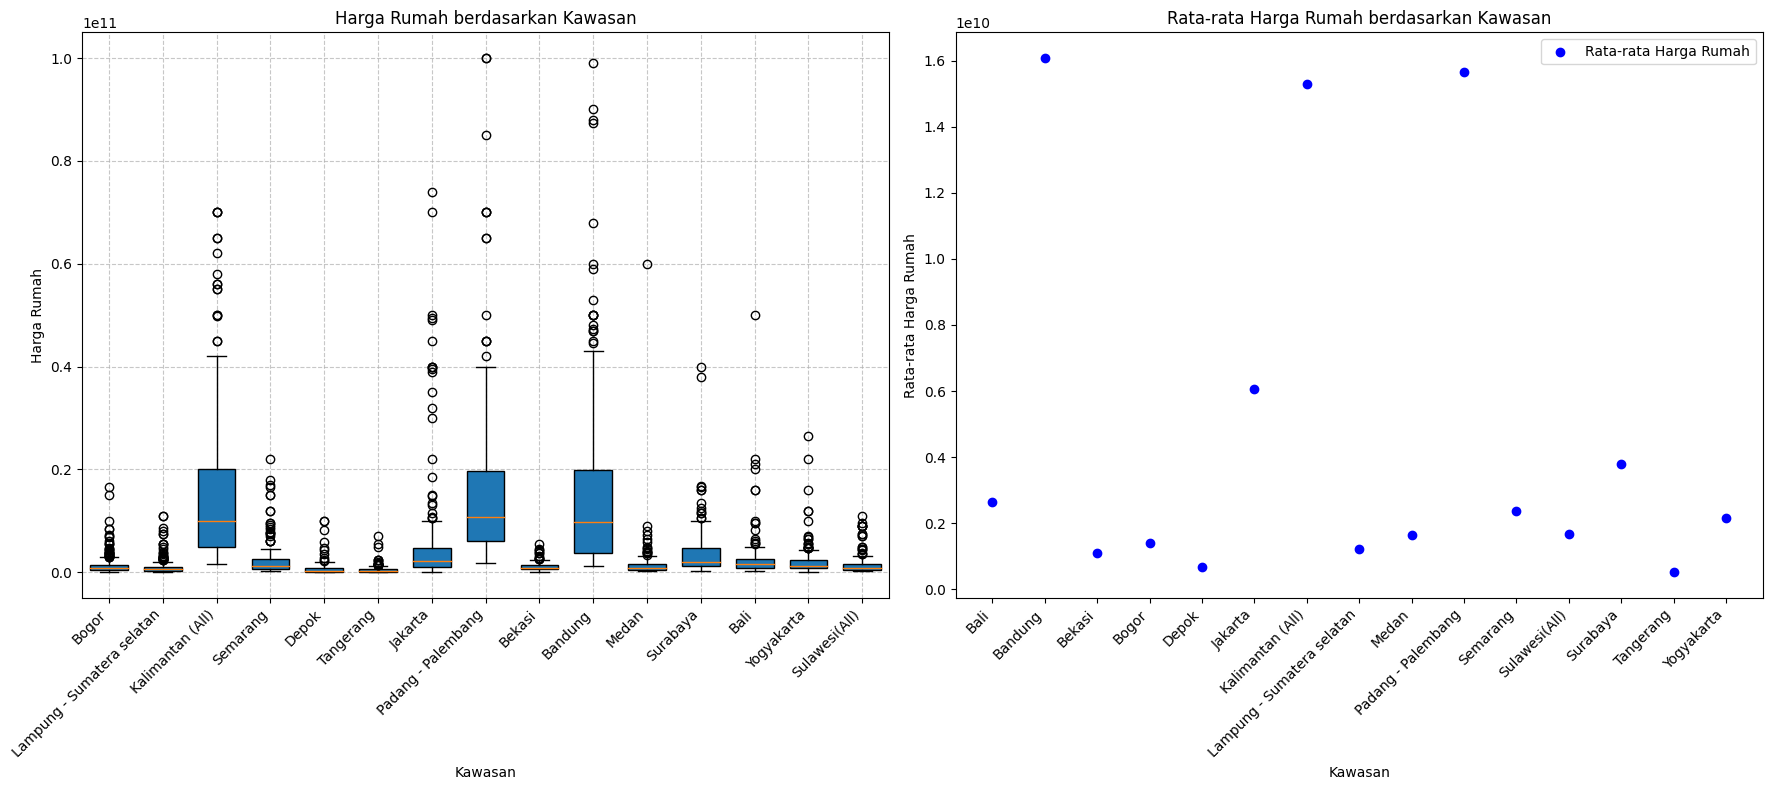

In [ ]:
#membuat df baru untuk visualisasi
data_by_region = [df[df['kawasan'] == region]['harga'].tolist() for region in df['kawasan'].unique()]
mean_prices = df.groupby('kawasan')['harga'].mean()
mean_prices_df = pd.DataFrame({'kawasan': mean_prices.index, 'mean_harga': mean_prices.values})

#membuat subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot
ax1.boxplot(data_by_region,
            labels=df['kawasan'].unique(),
            patch_artist=True,  #fill warna dalem box
            widths=0.7)  #ukuran box

ax1.set_title('Harga Rumah berdasarkan Kawasan')
ax1.set_xlabel('Kawasan')
ax1.set_ylabel('Harga Rumah')
ax1.set_xticks(range(1, len(df['kawasan'].unique()) + 1))
ax1.set_xticklabels(df['kawasan'].unique(), rotation=45, ha='right')  #miring biar muat
ax1.grid(True, linestyle='--', alpha=0.7)

#mean scatterplot
ax2.scatter(mean_prices_df['kawasan'], mean_prices_df['mean_harga'], color='blue', label='Rata-rata Harga Rumah')
ax2.set_title('Rata-rata Harga Rumah berdasarkan Kawasan')
ax2.set_xlabel('Kawasan')
ax2.set_ylabel('Rata-rata Harga Rumah')
ax2.set_xticks(mean_prices_df['kawasan'])
ax2.set_xticklabels(mean_prices_df['kawasan'], rotation=45, ha='right')  #miring biar muat
ax2.legend()

plt.tight_layout()
plt.show()

<ipython-input-190-bcfa3758d132>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 500, float('inf')], labels=['< 300M^2', '300-500M^2', '> 500M^2'])


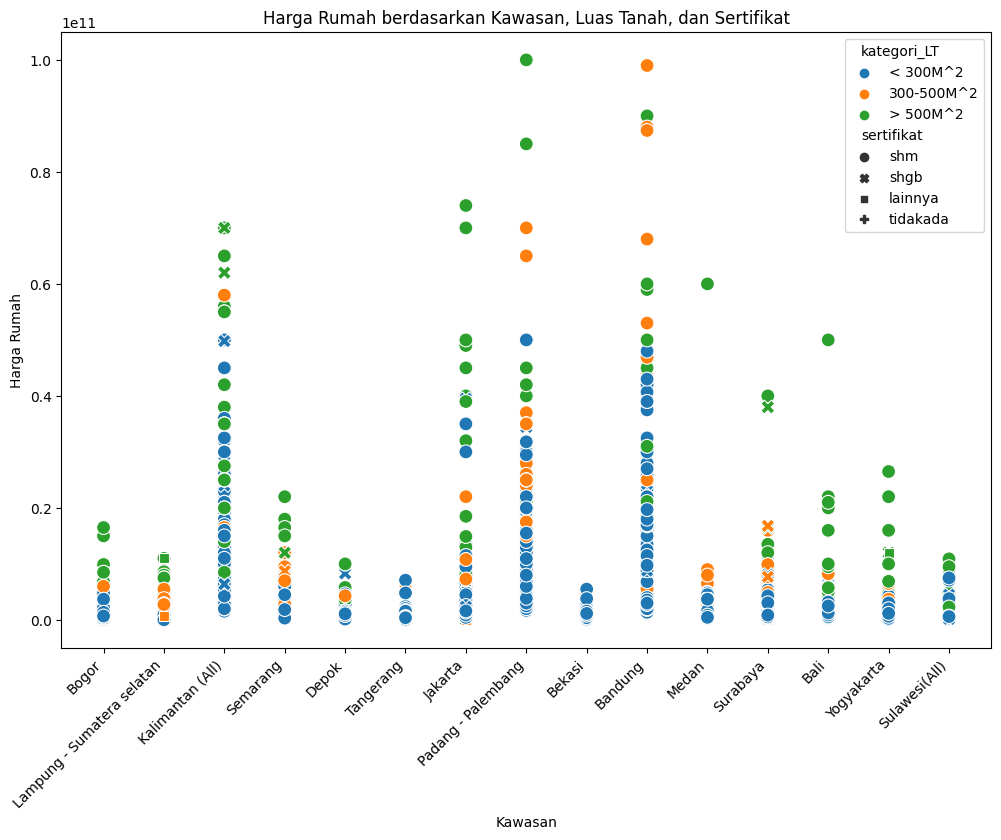

In [ ]:
#membuat variabel baru untuk kategori luas tanah
df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 500, float('inf')], labels=['< 300M^2', '300-500M^2', '> 500M^2'])
plt.figure(figsize=(12, 8))

#scatter plot
sns.scatterplot(x='kawasan', y='harga', hue='kategori_LT', style='sertifikat', data=df, s=100)

plt.title('Harga Rumah berdasarkan Kawasan, Luas Tanah, dan Sertifikat')
plt.xlabel('Kawasan')
plt.ylabel('Harga Rumah')
plt.xticks(rotation=45, ha='right')

plt.show()

Dari hasil visualisasi di atas, terlihat bahwa rata-rata harga rumah tertinggi ada di kawasan Kalimantan, Padang-Palembang, Bandung, dan Jakarta. Setelah dicek lebih lanjut:

- Dari luas tanah, keempat daerah tersebut tidak didominasi oleh rumah dengan tanah yang sangat luas sehingga membuat rata-rata penjualan rumah melambung tinggi.

- Sertifikat rumah seluruh kawasan juga didominasi oleh SHM, bukan keempat daerah tersebut saja (sertifikat SHM cenderung memiliki harga jual yang lebih tinggi).


Sehingga diduga daerah-daerah ini memang memiliki harga tanah yang lebih mahal dari daerah lainnya karena *demand* yang tinggi akibat ketersediaan lahan yang semakin sedikit atau memiliki infrastruktur dan pembangunan ekonomi yang baik.

## 4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

<ipython-input-191-951ce009876c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(jumlah_rumah_per_kawasan['index'], rotation=45, ha='right')  # Adjust rotation and alignment here


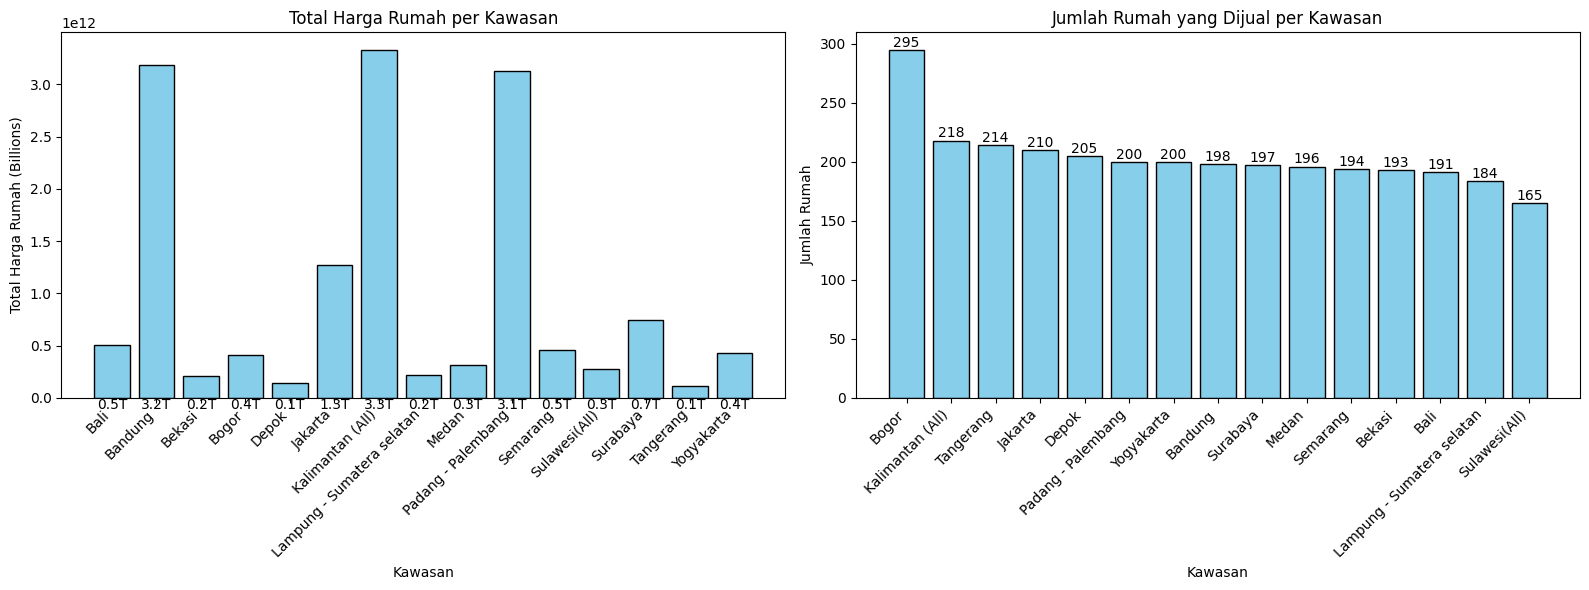

In [ ]:
total_harga_per_kawasan = df.groupby('kawasan')['harga'].sum().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot 1: Total Harga Rumah per Kawasan
bars = axes[0].bar(total_harga_per_kawasan['kawasan'], total_harga_per_kawasan['harga'], color='skyblue', edgecolor='black')
axes[0].set_title('Total Harga Rumah per Kawasan')
axes[0].set_xlabel('Kawasan')
axes[0].set_ylabel('Total Harga Rumah (Billions)')
axes[0].set_xticks(range(len(total_harga_per_kawasan['kawasan'])))
axes[0].set_xticklabels(total_harga_per_kawasan['kawasan'], rotation=45, ha='right')  # Adjust rotation and alignment here

# labels
for bar in bars:
    yval = float(bar.get_height() / 1e12)  # Divide by 1 Triliun and round to the nearest whole number
    axes[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}T', ha='center', va='top')  # Adjust va here

# Plot 2: Jumlah Rumah yang Dijual per Kawasan
jumlah_rumah_per_kawasan = df['kawasan'].value_counts().reset_index()

axes[1].bar(jumlah_rumah_per_kawasan['index'], jumlah_rumah_per_kawasan['kawasan'], color='skyblue', edgecolor='black')
axes[1].set_title('Jumlah Rumah yang Dijual per Kawasan')
axes[1].set_xlabel('Kawasan')
axes[1].set_ylabel('Jumlah Rumah')
axes[1].set_xticklabels(jumlah_rumah_per_kawasan['index'], rotation=45, ha='right')  # Adjust rotation and alignment here

# labels
for index, value in enumerate(jumlah_rumah_per_kawasan['kawasan']):
    axes[1].text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Terlihat bahwa kawasan Bogor memiliki total penjualan rumah tertinggi, tetapi jika dicek lebih lanjut ternyata harga dari rumah yang dijual tidak terlalu tinggi. Hal ini dikhawatirkan tidak akan membawa banyak keuntungan bagi perusahaan.

Total penjualan dengan harga tertinggi berada di kawasan Bandung, Kalimantan, dan Padang-Palembang. Kalimantan memilki total penjualan dengan harga tertinggi, tetapi tidak berbeda jauh dengan kawasan Bandung dan Padang-Palembang. Padahal, jumlah rumah yang dijual sebanyak 218 (berbeda 20 rumah dengan Bandung dan 18 rumah dengan Padang-Palembang).




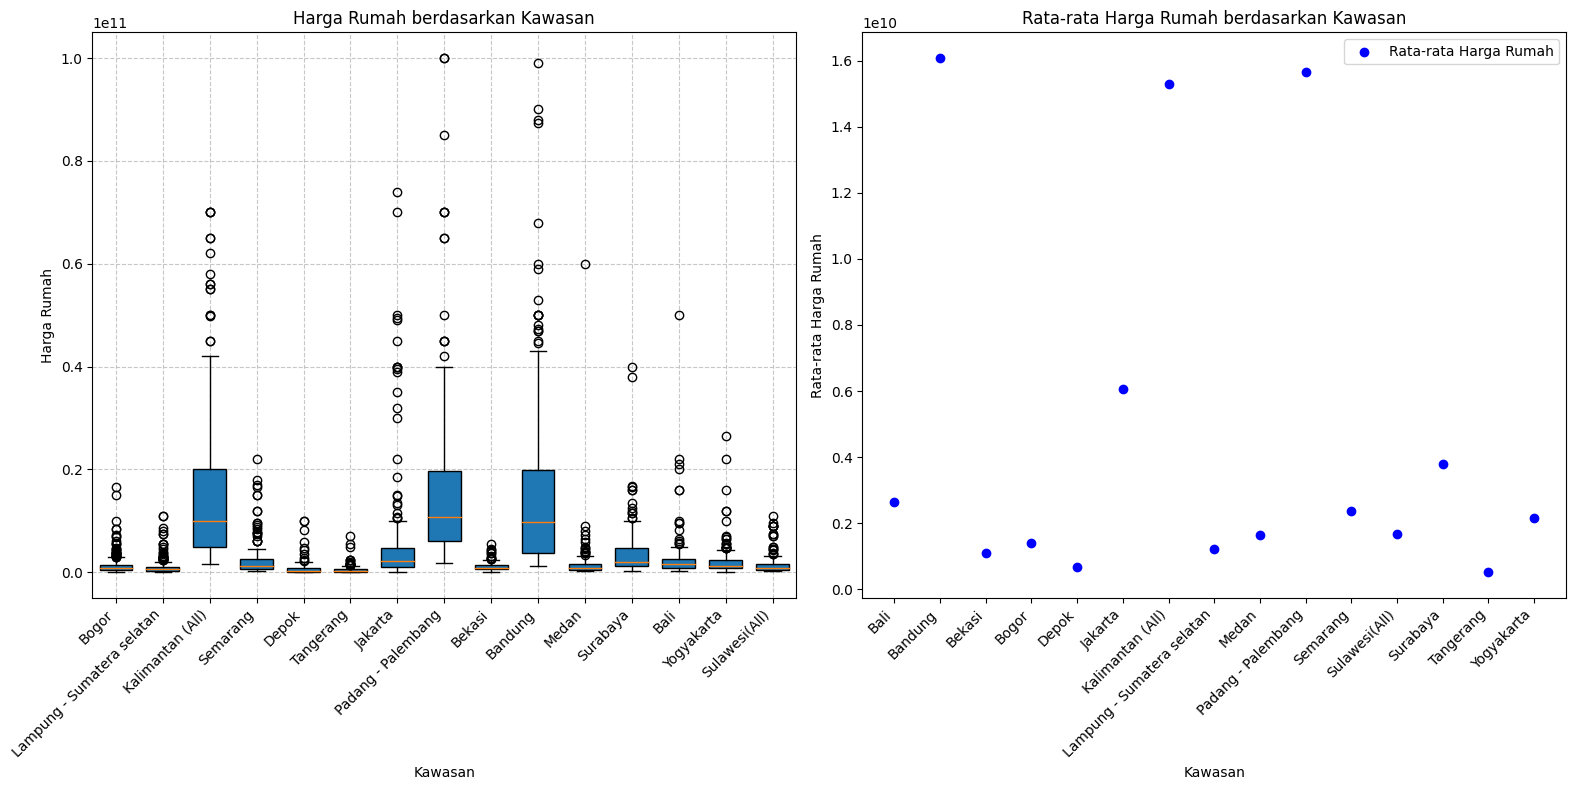

In [ ]:
#membuat df baru untuk visualisasi
data_by_region = [df[df['kawasan'] == region]['harga'].tolist() for region in df['kawasan'].unique()]
mean_prices = df.groupby('kawasan')['harga'].mean()
mean_prices_df = pd.DataFrame({'kawasan': mean_prices.index, 'mean_harga': mean_prices.values})

# membuat subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Boxplot
ax1.boxplot(data_by_region,
            labels=df['kawasan'].unique(),
            patch_artist=True,  #fill warna dalem box
            widths=0.7)  #ukuran box

ax1.set_title('Harga Rumah berdasarkan Kawasan')
ax1.set_xlabel('Kawasan')
ax1.set_ylabel('Harga Rumah')
ax1.set_xticks(range(1, len(df['kawasan'].unique()) + 1))
ax1.set_xticklabels(df['kawasan'].unique(), rotation=45, ha='right')  #miring biar muat
ax1.grid(True, linestyle='--', alpha=0.7)

#mean scatterplot
ax2.scatter(mean_prices_df['kawasan'], mean_prices_df['mean_harga'], color='blue', label='Rata-rata Harga Rumah')
ax2.set_title('Rata-rata Harga Rumah berdasarkan Kawasan')
ax2.set_xlabel('Kawasan')
ax2.set_ylabel('Rata-rata Harga Rumah')
ax2.set_xticks(mean_prices_df['kawasan'])
ax2.set_xticklabels(mean_prices_df['kawasan'], rotation=45, ha='right')  #miring biar muat
ax2.legend()

plt.tight_layout()
plt.show()

Melihat tren harga rumah dari masing-masing kawasan per tahun berdasarkan luas tanah menggunakan Tableau:

https://public.tableau.com/app/profile/favian.sulthan.wafi/viz/DataMiningCaseStudy01Kelompok3/Dashboard1#1

In [ ]:
df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 500, float('inf')], labels=['< 300M^2', '300-500M^2', '> 500M^2'])
print(df.groupby(['kategori_LT'])['kategori_LT'].count())

kategori_LT
< 300M^2      2670
300-500M^2     202
> 500M^2       188
Name: kategori_LT, dtype: int64


<ipython-input-193-48fb1a99cb2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 500, float('inf')], labels=['< 300M^2', '300-500M^2', '> 500M^2'])


Jika dilihat lebih lanjut, ternyata Bandung dan Padang-Palembang memiliki jumlah rumah dengan harga tinggi yang lebih banyak sehingga rata-rata harga rumah kedua kawasan tersebut lebih tinggi dari Kalimantan sehingga kedua kawasan tersebut lebih potensial.

Kemudian melihat tren harga rumah di Kawasan Bandung dan Padang-Palembang per tahun didapat beberapa informasi berikut:
1. Jumlah rumah di Bandung dengan luas tanah < 300m^2 mengalami penurunan sebanyak 12 rumah dari tahun 2021 ke 2023 . Akan tetapi, rata-rata Harga rumah di tahun 2023 tidak berbeda jauh dari tahun 2021, hanya sekitar 2M.
Kemudian, rumah dengan luas tanah 300-500m^2 mengalami penurunan sebanyak 1 rumah dari tahun 2021 ke 2023, tetapi rata-rata harga Rumah di tahun 2023 mengalami kenaikan yang cukup drastis, sekitar 5M.
Selain itu, rumah dengan luas tanah > 500m^2 mengalami kenaikan sebanyak 7  rumah dari tahun 2021 ke 2023, tetapi rata-rata harga Rumah di tahun 2023 mengalami penurunan yang cukup drastis, sekitar 17M.
Hal ini mengindikasikan adanya tren penurunan harga rumah di daerah Bandung dengan luas tanah > 500m^2
2. Jumlah rumah di Padang-Palembang dengan luas tanah < 300m^2 dari tahun 2021 ke 2023 mengalami kenaikan sebanyak 4 rumah. Akan tetapi, rata-rata harga rumah di tahun 2023 tetap stagnan.
Kemudian, jumlah rumah dengan luas tanah 300-500m^2 tetap sama dari tahun 2021 ke 2023, tetapi rata-rata harga Rumah di tahun 2023 mengalami penurunan yang sangat drastis, sekitar 17M.
Hal ini mengindikasikan adanya tren penurunan harga rumah di daerah Padang-Palembang dengan luas tanah < 500m^2

Kemudian, dapat dilihat pula total penjualan tertinggi dari masing-masing kawasan dan jumlah rumah  yang dijual terbanyak berasal dari rumah dengan luas tanah < 500m^2 sehingga adanya tren penurunan harga rata-rata rumah dengan luas tanah < 500 m^2 yang cukup drastis dapat berdampak fatal pada penghasilan total perusahaan.

Dengan begitu, kami merekomendasikan RPPI untuk membuat kantor cabang di Kawasan Bandung.



## 5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?

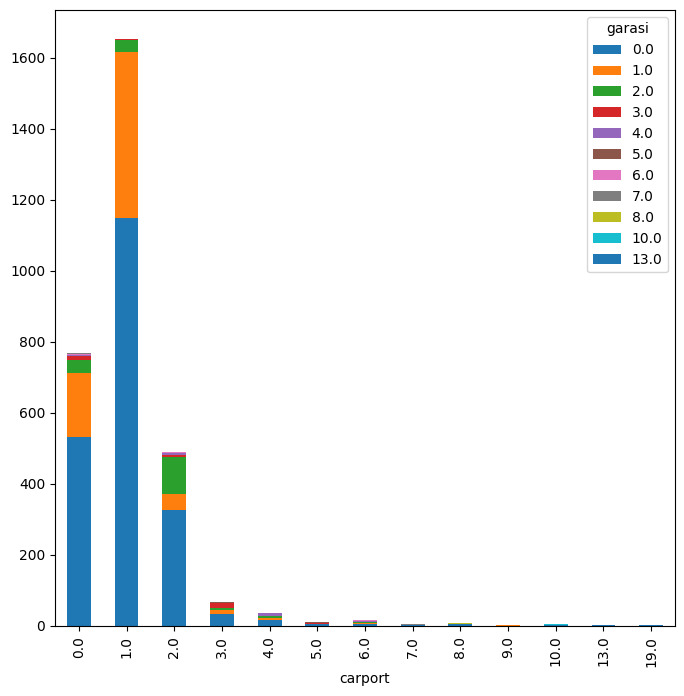

In [ ]:
CT = pd.crosstab(index=df["carport"], columns=df["garasi"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

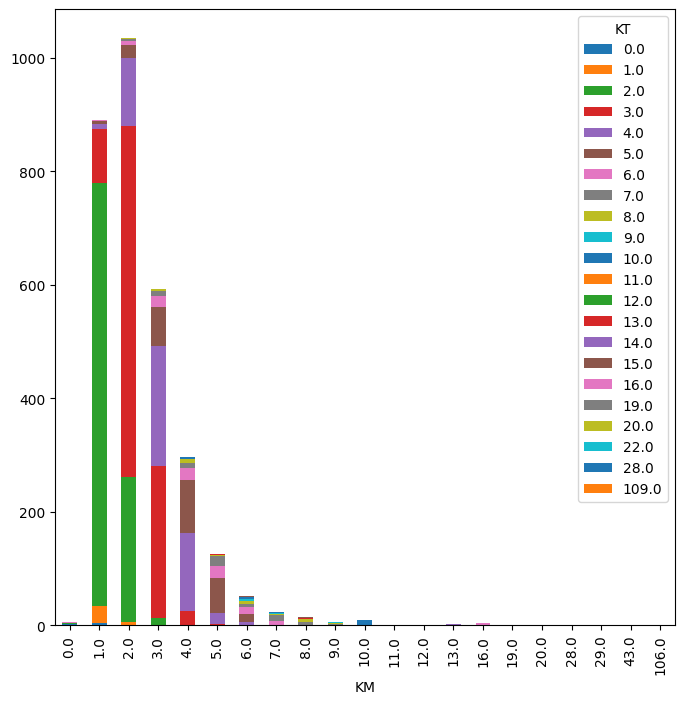

In [ ]:
CT = pd.crosstab(index=df["KM"], columns=df["KT"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

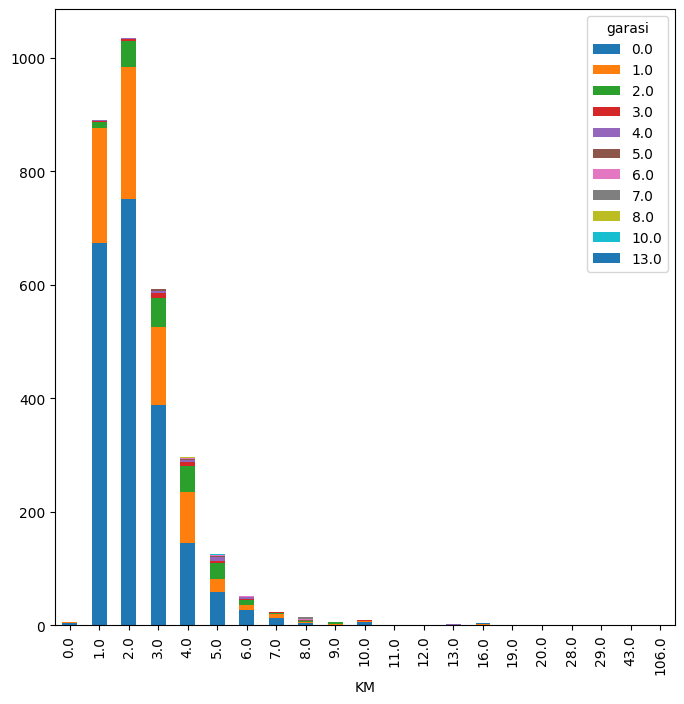

In [ ]:
CT = pd.crosstab(index=df["KM"], columns=df["garasi"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

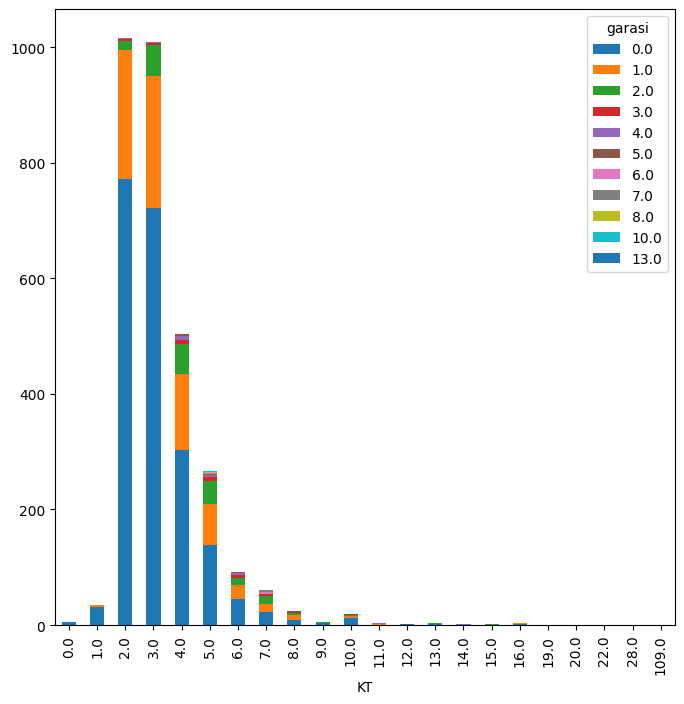

In [ ]:
CT = pd.crosstab(index=df["KT"], columns=df["garasi"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

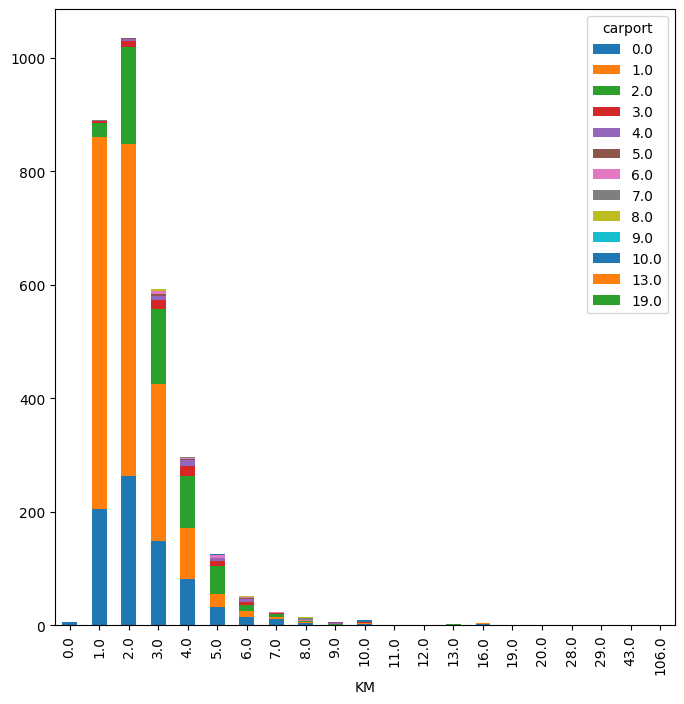

In [ ]:
CT = pd.crosstab(index=df["KM"], columns=df["carport"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

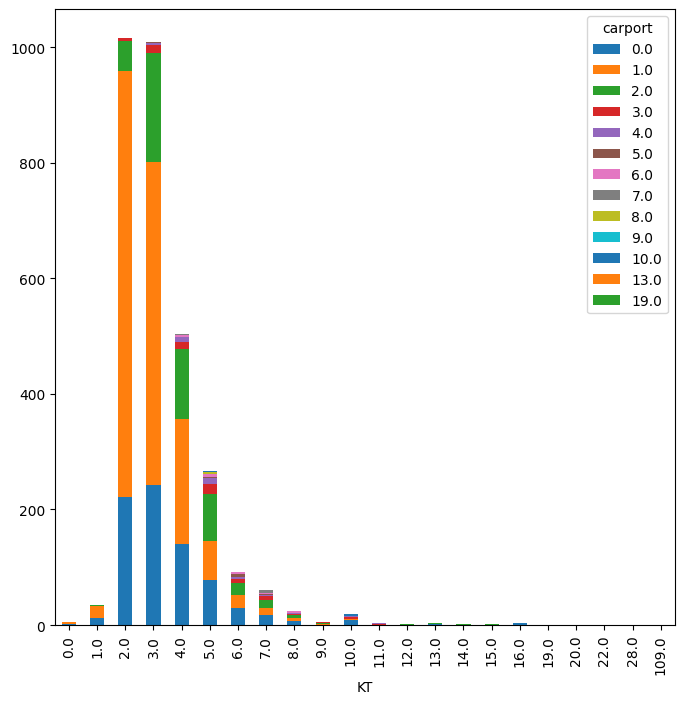

In [ ]:
CT = pd.crosstab(index=df["KT"], columns=df["carport"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Berdasarkan hasil 6 plot di atas, diperoleh bahwa rumah yang paling banyak terjual memiliki 2 kamar tidur, 2 kamar mandi, 1 carport, dan 0 garasi.

In [ ]:
df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 500, float('inf')], labels=['< 300M^2', '300-500M^2', '> 500M^2'])
print(df.groupby(['kategori_LT'])['kategori_LT'].count())

kategori_LT
< 300M^2      2670
300-500M^2     202
> 500M^2       188
Name: kategori_LT, dtype: int64


<ipython-input-200-48fb1a99cb2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 500, float('inf')], labels=['< 300M^2', '300-500M^2', '> 500M^2'])


In [ ]:
df['kategori_LB'] = pd.cut(df['LB'], bins=[0, 200, 400, float('inf')], labels=['< 200M^2', '200-400M^2', '> 400M^2'])
print(df.groupby(['kategori_LB'])['kategori_LB'].count())

kategori_LB
< 200M^2      2394
200-400M^2     453
> 400M^2       213
Name: kategori_LB, dtype: int64


<ipython-input-201-b1398357d625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_LB'] = pd.cut(df['LB'], bins=[0, 200, 400, float('inf')], labels=['< 200M^2', '200-400M^2', '> 400M^2'])


Dilakukan pencarian rumah dengan kriteria luas tanah dan luas bangunan yang paling banyak terjual. Diperoleh rumah yang paling banyak terjual adalah yang memiliki luas tanah <300m^2 dan luas bangunan <200m^2.


Sehingga dapat disimpulkan bahwa rumah dengan karakteristik paling banyak terjual adalah rumah yang memiliki:
1. Luas Tanah = <300m^2
2. Luas Bangunan = <200m^2
3. Kamar Tidur = 2
4. Kamar Mandi = 2
5. Garasi = 0
6. Carport = 1

## 6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['tahun'] = df['created_at'].dt.year

df

<ipython-input-202-1e51168158dc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['created_at'] = pd.to_datetime(df['created_at'])
<ipython-input-202-1e51168158dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])
<ipython-input-202-1e51168158dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tahun'] = df

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi,kategori_LT,kategori_LB,tahun
0,Bogor,2021-12-03,75,38.0,2.0,1.0,1.0,1.0,Bojonggede,shm,1300,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",< 300M^2,< 200M^2,2021
1,Bogor,2021-12-06,60,40.0,1.0,1.0,0.0,1.0,Babakan Madang,shm,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,< 300M^2,< 200M^2,2021
2,Bogor,2021-12-06,60,50.0,2.0,2.0,0.0,1.0,Babakan Madang,shm,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,< 300M^2,< 200M^2,2021
3,Bogor,2021-12-06,60,70.0,3.0,2.0,0.0,1.0,Babakan Madang,shm,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,< 300M^2,< 200M^2,2021
4,Bogor,2021-12-06,90,60.0,3.0,2.0,0.0,2.0,Babakan Madang,shm,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,< 300M^2,< 200M^2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,Sulawesi(All),2023-09-19,1030,467.0,2.0,1.0,0.0,1.0,"Malalayang, Manado",shm,2719,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,> 500M^2,> 400M^2,2023
3056,Sulawesi(All),2023-09-18,96,96.0,2.0,1.0,0.0,1.0,"Tanjung Bunga, Makassar, Sulawesi Selatan",shm,3500,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ...",< 300M^2,< 200M^2,2023
3057,Sulawesi(All),2023-09-17,115,45.0,2.0,1.0,0.0,1.0,"Palu Selatan, Palu, Sulawesi Tengah",shm,1300,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...,< 300M^2,< 200M^2,2023
3058,Sulawesi(All),2023-09-14,102,72.0,2.0,1.0,0.0,1.0,"Puuwatu, Kendari. Sulawesi Tenggara",shgb,900,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,< 300M^2,< 200M^2,2023


In [ ]:
df_2021 = df[df['tahun'] == 2021]
df_2023 = df[df['tahun'] == 2023]
df_2021=df_2021.groupby(['kawasan','kategori_LT'])['harga'].mean().reset_index()
df_2023=df_2023.groupby(['kawasan','kategori_LT'])['harga'].mean().reset_index()

([<matplotlib.axis.YTick at 0x7a1fdea90130>,
 [Text(0, 10000000000, '1.0'),
  Text(0, 15000000000, '1.5'),
  Text(0, 20000000000, '2.0'),
  Text(0, 25000000000, '2.5'),
  Text(0, 30000000000, '3.0'),
  Text(0, 35000000000, '3.5'),
  Text(0, 40000000000, '4.0'),
  Text(0, 45000000000, '4.5'),
  Text(0, 50000000000, '5.0')])

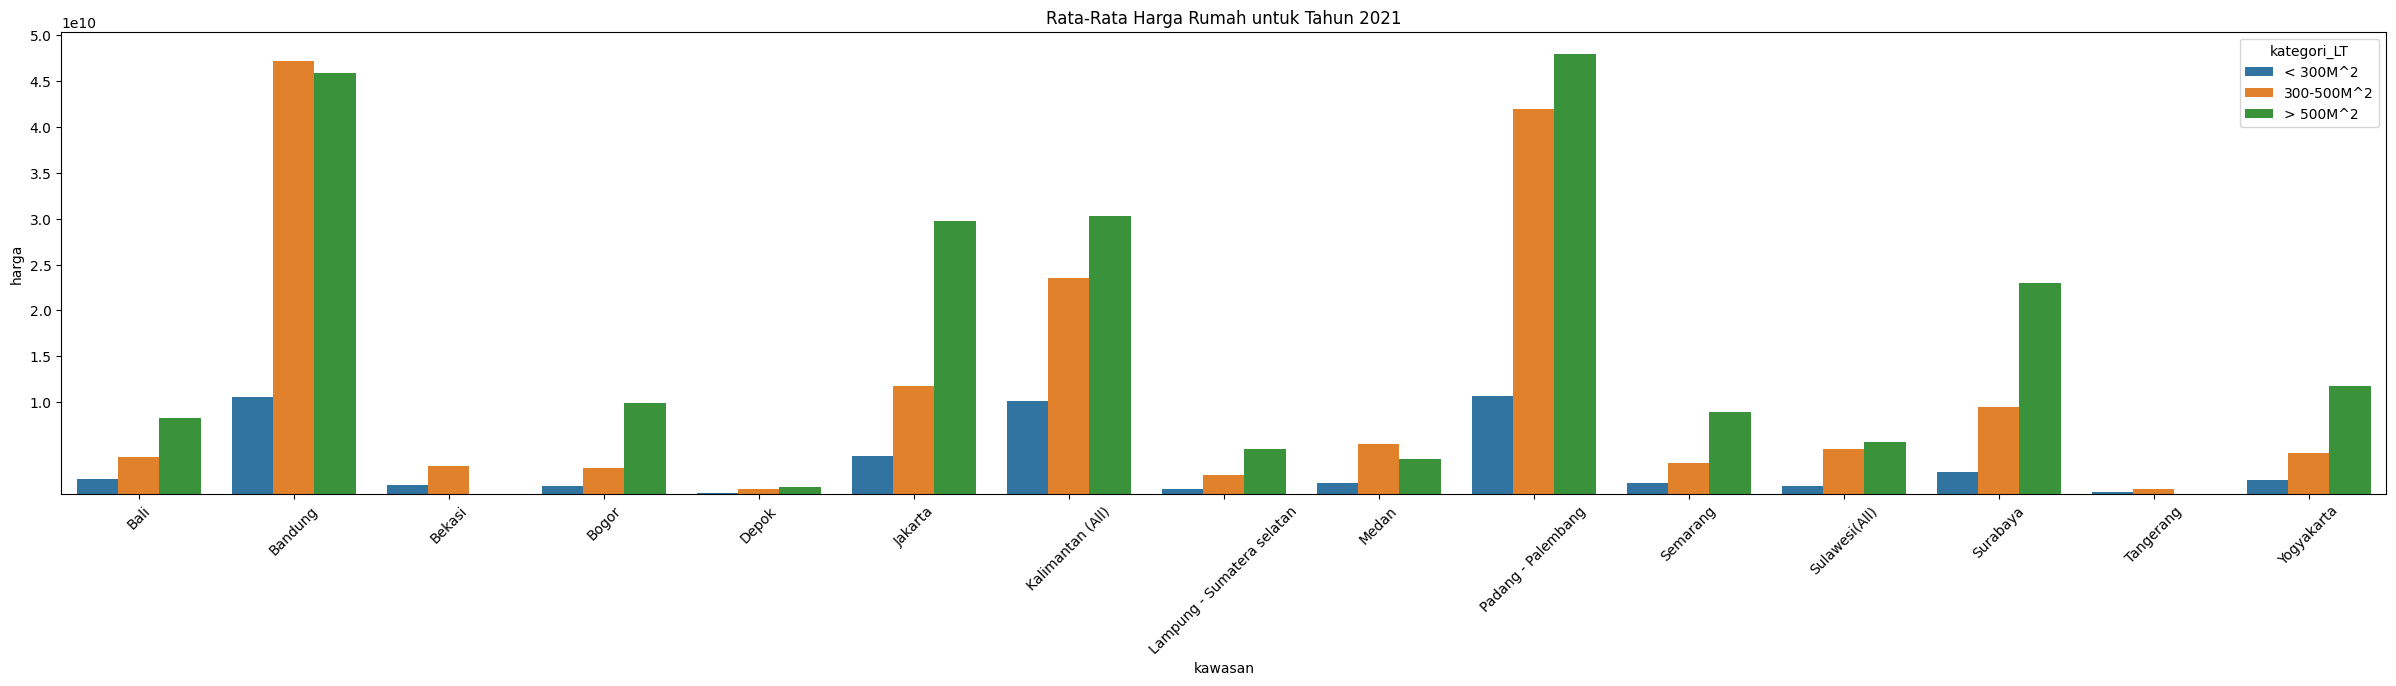

In [ ]:
plt.figure(figsize=(30, 6))
sns.barplot(df_2021, x="kawasan", y="harga", hue="kategori_LT")
plt.title('Rata-Rata Harga Rumah untuk Tahun 2021')
plt.xticks(rotation=45)
plt.yticks([10000000000,15000000000,20000000000,25000000000,30000000000,35000000000,40000000000,45000000000,50000000000])

([<matplotlib.axis.YTick at 0x7a1fe11fb310>,
 [Text(0, 10000000000, '1.0'),
  Text(0, 15000000000, '1.5'),
  Text(0, 20000000000, '2.0'),
  Text(0, 25000000000, '2.5'),
  Text(0, 30000000000, '3.0'),
  Text(0, 35000000000, '3.5'),
  Text(0, 40000000000, '4.0'),
  Text(0, 45000000000, '4.5'),
  Text(0, 50000000000, '5.0')])

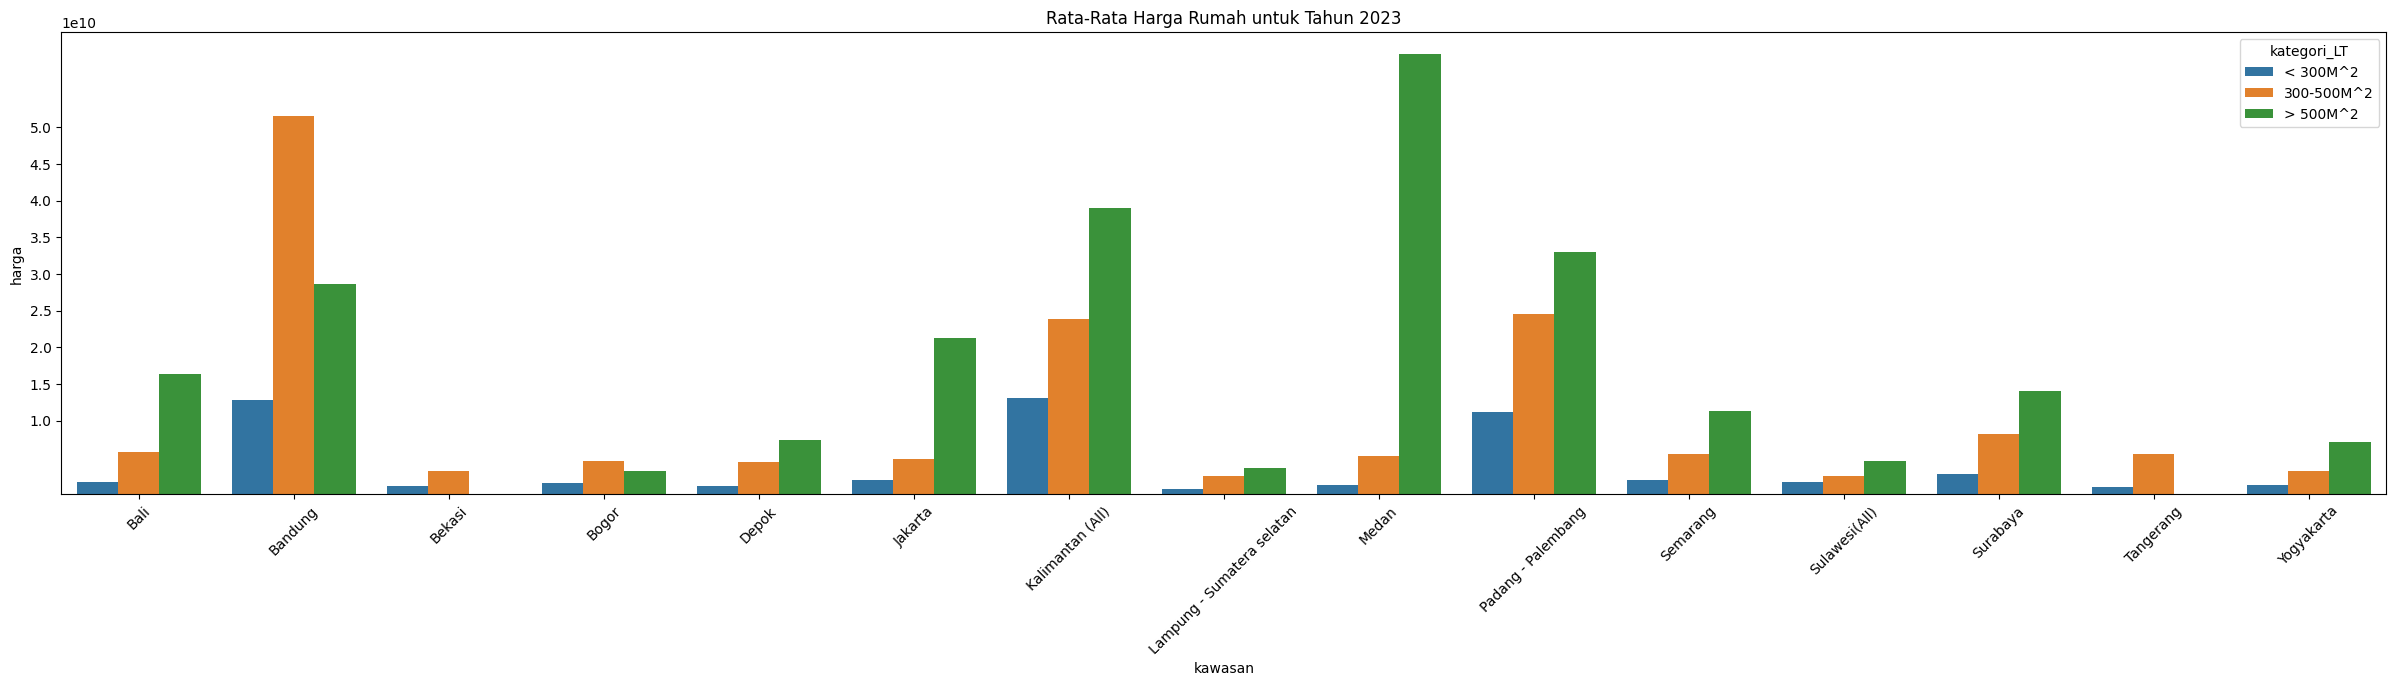

In [ ]:
plt.figure(figsize=(30,6))
sns.barplot(df_2023, x="kawasan", y="harga", hue="kategori_LT")
plt.title('Rata-Rata Harga Rumah untuk Tahun 2023')
plt.xticks(rotation=45)
plt.yticks([10000000000,15000000000,20000000000,25000000000,30000000000,35000000000,40000000000,45000000000,50000000000])

In [ ]:
sorted_df = df.sort_values(['LT', 'harga', 'LB'], ascending=[False, True, False])

filtered_df = sorted_df[sorted_df["sertifikat"] == "shm"]

filtered_df

,kawasan,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,url,deskripsi,kategori_LT,kategori_LB,tahun
2680,Bali,2023-07-30,5050.0,100.0,3.0,3.0,0.0,3.0,Bangli,shm,2200,5000000000,https://www.rumah.com/listing-properti/dijual-...,AGROWISATA KEBUN STRAWBERY KINTAMANI\n\nSpesif...,> 500M^2,< 200M^2,2023
2682,Bali,2023-05-31,3430.0,2875.0,10.0,10.0,0.0,10.0,Bangli,shm,23000,50000000000,https://www.rumah.com/listing-properti/dijual-...,"Luxurious villa, good for invesment\nLuxurious...",> 500M^2,> 400M^2,2023
1324,Jakarta,2021-05-12,3422,64.0,1.0,1.0,0.0,1.0,Jakarta Pusat,shm,2200,1050000000,https://www.rumah.com/listing-properti/dijual-...,Vlaster cempaka merupakan suatu kompleks perum...,> 500M^2,< 200M^2,2021
365,Lampung - Sumatera selatan,2021-04-08,2662,378.0,7.0,5.0,2.0,2.0,"Kedaton, Bandar Lampung",shm,1300,2550000000,https://www.rumah123.com/properti/bandar-lampu...,"Pekarangan luas kiri kanan dpn blkg, Parkir : ...",> 500M^2,200-400M^2,2021
369,Lampung - Sumatera selatan,2021-11-24,2500,120.0,3.0,2.0,0.0,0.0,"Banyuasin III, Banyuasin",shm,900,400000000,https://www.rumah123.com/properti/banyuasin/ho...,Dijual rumah seluas 120m2 dan diatas lahan 2.5...,> 500M^2,< 200M^2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,Jakarta,2021-06-12,19,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,shm,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",< 300M^2,< 200M^2,2021
1332,Jakarta,2021-07-12,18,33.0,2.0,1.0,0.0,0.0,Jakarta Pusat,shm,2200,425000000,https://www.rumah.com/listing-properti/dijual-...,"Kualitas bangunan & material terbaik, one gate...",< 300M^2,< 200M^2,2021
1330,Jakarta,2021-02-12,16,32.0,1.0,1.0,0.0,0.0,Jakarta Pusat,shm,2200,380000000,https://www.rumah.com/listing-properti/dijual-...,Sangat cocok untuk huni dan investasi. Lokasi ...,< 300M^2,< 200M^2,2021
1468,Jakarta,2023-07-06,15,52.0,2.0,1.0,0.0,1.0,"Cilandak, Jakarta Selatan",shm,2200,999000000,https://www.rumah123.com/properti/jakarta-sela...,Sumber air PAM. Carport 1. SHM-Pegang Sendiri....,< 300M^2,< 200M^2,2023


Apabila dilakukan perbandingan rata-rata harga rumah pada setiap kawasan antara tahun 2021 dengan 2023 dari plot di atas, dapat dilihat bahwa rata-rata harga rumah dengan luas tanah >500m^2 di Bali mengalami kenaikan harga terutama. Selain itu, dilihat juga dari filter yang diterapkan bahwa rumah di Bali termasuk yang teratas untuk direkomendasikan berdasarkan luas tanah, luas bangunan, dan harga rumah tersebut.

Dapat dilihat juga bahwa terjadi kenaikkan harga yang signifikan untuk rata-rata harga rumah dengan luas tanah >500m^2 di Medan dari tahun 2021 ke tahun 2023.

Maka rumah-rumah yang akan kami rekomendasikan adalah:
1. Rumah di Bali (Bangli) dengan luas tanah 1500m^2 dan luas bangunan 800m^2 seharga Rp5.750.000.000. Rumah ini kami rekomendasikan karena letaknya yang strategis dimana dapat dijadikan villa. Villa di Bali cukup menguntungkan karena banyaknya turis yang sering berkunjung dan khususnya dapat dijadikan villa untuk acara/perkumpulan keluarga karena jumlah kamar yang sangat memadai. Rumah ini memiliki 7 kamar tidur, 9 kamar mandi, 2 garasi, dan 8 carport.
2. Rumah di Medan (Medan Johor) dengan luas tanah 824m^2 dan luas bangunan 433m^2	seharga Rp3.400.000.000. Rumah ini cukup luas dan memiliki karakteristik yang memadai. Selain itu, rumah ini memiliki kapasitas yang cukup besar dimana memiliki 7 kamar tidur, 7 kamar mandi, 2 garasi, dan 6 carport.

## 7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

<ipython-input-207-15fba4599d5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 400, float('inf')], labels=['< 300', '300-400', '> 400'])
<ipython-input-207-15fba4599d5b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='kawasan', y='listrik', hue='kategori_LT', data=df, ci=None)


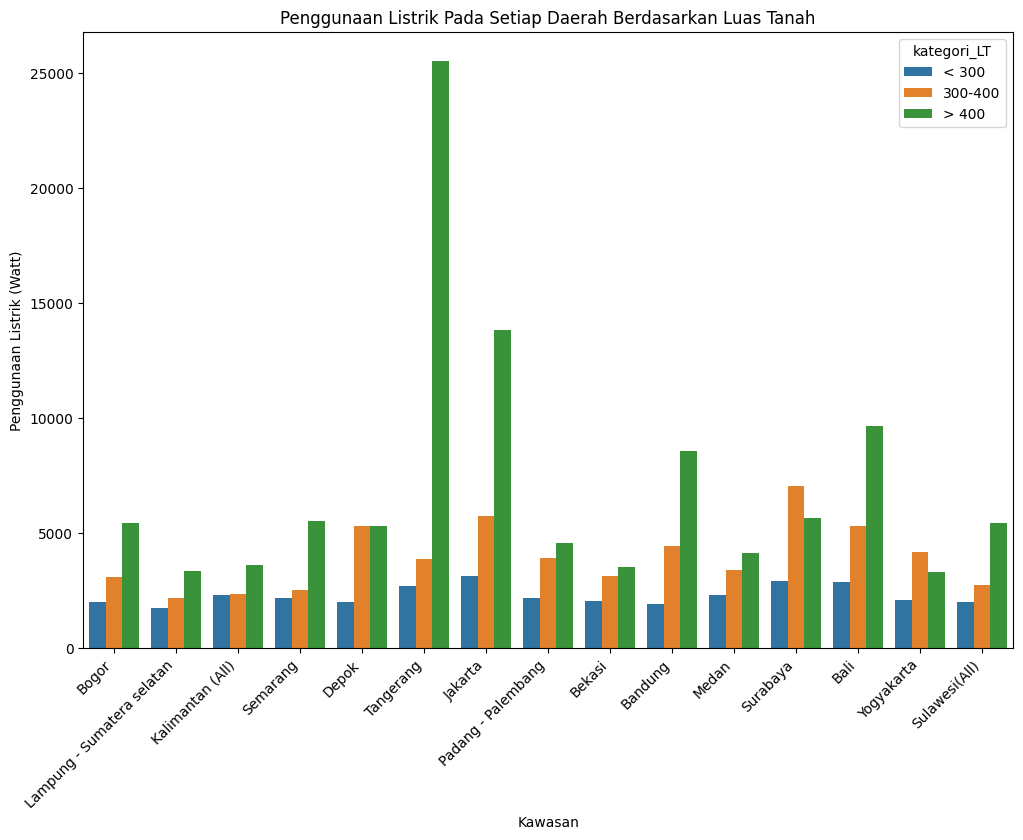

In [ ]:
df['kategori_LT'] = pd.cut(df['LT'], bins=[0, 300, 400, float('inf')], labels=['< 300', '300-400', '> 400'])


plt.figure(figsize=(12, 8))
sns.barplot(x='kawasan', y='listrik', hue='kategori_LT', data=df, ci=None)
plt.title('Penggunaan Listrik Pada Setiap Daerah Berdasarkan Luas Tanah')
plt.xlabel('Kawasan')
plt.ylabel('Penggunaan Listrik (Watt)')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan hasil di atas, dapat dilihat bahwa rumah-rumah dengan penggunaan listrik paling besar secara umum terdapat pada rumah dengan luas tanah >400m^2. Namun untuk yang terbesar terdapat pada kawasan Tangerang dengan kategori luas tanah >400m^2 dimana mencapai >25.000 watt. Dilanjutkan oleh Jakarta dengan penggunaan listrik mendekati 15.000 watt dan Bali mendekati 10.000 watt.

Sedangkan bahwa rumah-rumah dengan penggunaan listrik relatif kecil secara umum terdapat pada rumah dengan luas tanah <300m^2. Untuk penggunaan listrik terkecil terdapat di kawasan Lampung-Sumatera Selatan.

Hal ini dapat menjadi bahan pertimbangan konsumen untuk memilih jenis rumah yang paling sesuai dengan kebutuhan mereka.